In [27]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import joblib
from PIL import Image

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mnist.csv to mnist.csv


In [3]:
df = pd.read_csv('mnist.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X =df.drop(df.columns[0], axis=1).values
y = df[df.columns[0]].values

In [6]:
import numpy as np

# X_fixed = np.hstack([X, np.zeros((X.shape[0],1))])  # add a column of zeros - This line is causing the error
X_cnn = X.reshape(-1,28,28,1) / 255.0

In [7]:
y_cat = to_categorical(y, num_classes=len(np.unique(y)))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# ANN APPROCH

In [9]:
from tensorflow.keras import models, layers

In [11]:
model_ann = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss, test_acc = model_ann.evaluate(X_test, y_test)
print(f"ANN Test Accuracy: {test_acc*100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6170 - loss: 29.3428 - val_accuracy: 0.9000 - val_loss: 1.3880
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8431 - loss: 2.5333 - val_accuracy: 0.9212 - val_loss: 0.7398
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8738 - loss: 1.3622 - val_accuracy: 0.9237 - val_loss: 0.6070
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8917 - loss: 1.0212 - val_accuracy: 0.9225 - val_loss: 0.5534
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9059 - loss: 0.6184 - val_accuracy: 0.9375 - val_loss: 0.4094
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9197 - loss: 0.5189 - val_accuracy: 0.9400 - val_loss: 0.3205
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9320 - loss: 0.4114 - val_accuracy: 0.9362 - val_loss: 0.4412
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9338 - loss: 0.3896 - val_accuracy: 0.9425 - va

#CNN APPROACH

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cat, test_size=0.2, random_state=42)

In [13]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [15]:
history_cnn = model_cnn.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.6269 - loss: 1.1834 - val_accuracy: 0.9550 - val_loss: 0.1597
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9543 - loss: 0.1719 - val_accuracy: 0.9650 - val_loss: 0.1158
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9603 - loss: 0.1157 - val_accuracy: 0.9725 - val_loss: 0.0818
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.0851 - val_accuracy: 0.9812 - val_loss: 0.0723
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0624 - val_accuracy: 0.9812 - val_loss: 0.0606


In [16]:
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_acc*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9699 - loss: 0.0970
CNN Test Accuracy: 97.25%


In [17]:
history_cnn.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
import plotly.graph_objects as go

epochs = list(range(1, len(history_cnn.history['accuracy']) + 1))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=history_cnn.history['accuracy'],
    mode='lines+markers',
    name='Train Accuracy'
))

fig.add_trace(go.Scatter(
    x=epochs,
    y=history_cnn.history['val_accuracy'],
    mode='lines+markers',
    name='Validation Accuracy'
))

fig.update_layout(
    title='CNN Training & Validation Accuracy',
    xaxis_title='Epochs',
    yaxis_title='Accuracy',
    template='plotly_white'
)

fig.show()

In [31]:
import plotly.graph_objects as go

epochs = list(range(1, len(history_cnn.history['loss']) + 1))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=history_cnn.history['loss'],
    mode='lines+markers',
    name='Train Loss'
))

fig.add_trace(go.Scatter(
    x=epochs,
    y=history_cnn.history['val_loss'],
    mode='lines+markers',
    name='Validation Loss'
))

fig.update_layout(
    title='CNN Training & Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    template='plotly_white'
)

fig.show()

In [20]:
# Predict classes for test set
y_pred_probs = model_cnn.predict(X_test)           # probabilities
y_pred = y_pred_probs.argmax(axis=1)              # predicted labels
y_true = y_test.argmax(axis=1)                     # true labels

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


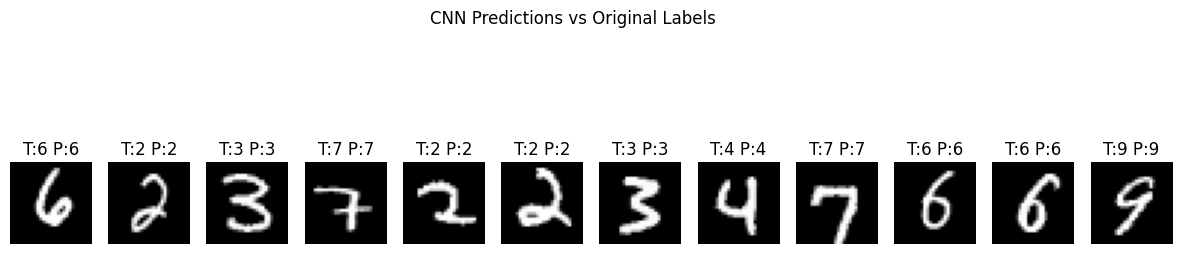

In [33]:
import matplotlib.pyplot as plt

num_examples = 12 # number of images to display
plt.figure(figsize=(15,4))

for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')  # reshape for 28x28 images
    plt.title(f"T:{y_true[i]} P:{y_pred[i]}")          # TRUE VS PREDICTED
    plt.axis('off')

plt.suptitle("CNN Predictions vs Original Labels")
plt.show()

In [29]:
import joblib

joblib.dump(model_cnn , "digit_model.pkl")

['digit_model.pkl']